## Chords Detection

In [15]:
import IPython.display as ipd
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

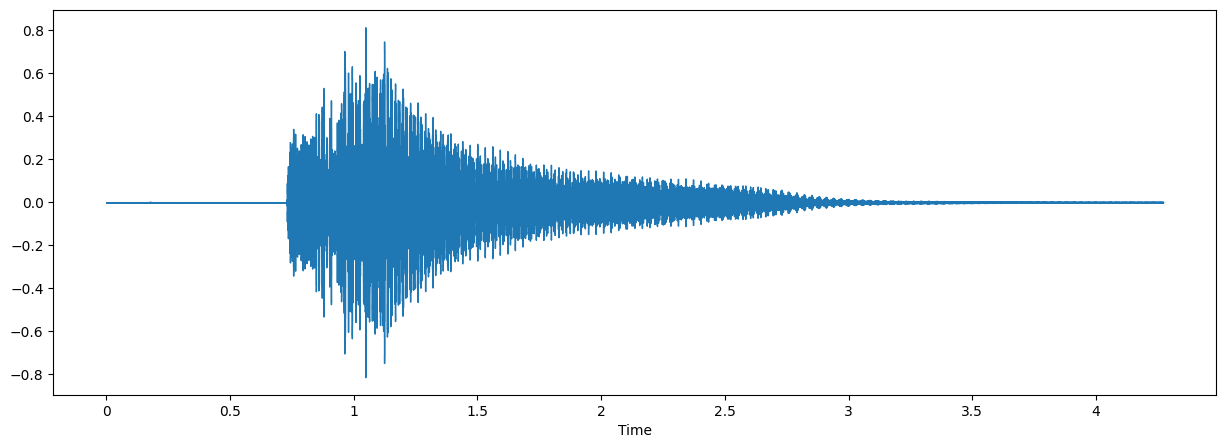

In [21]:
filename='chords/C_Classic_Jo_1.wav'
plt.figure(figsize=(15,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [23]:
sample_rate

22050

In [43]:
import pandas as pd

metadata = pd.read_csv('chords/metadata/chords.csv')
metadata.head()

,slice_file_name,fold,classID,class
0,Am_AcustiicPlug14_3.wav,1,0,Am
1,Am_AcustiicPlug14_4.wav,1,0,Am
2,Am_Classic_Jegundo_1.wav,1,0,Am
3,Am_Classic_Jegundo_2.wav,1,0,Am
4,Am_Classic_Jegundo_3.wav,1,0,Am


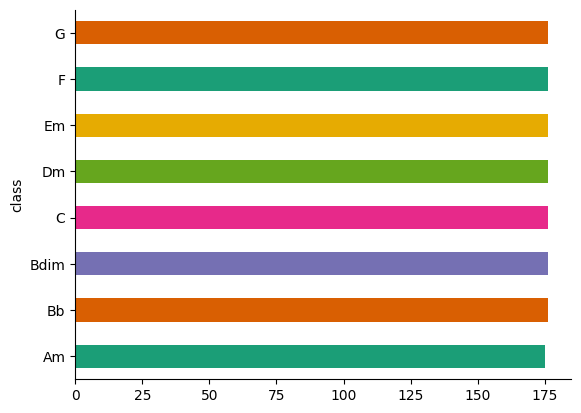

In [29]:
import seaborn as sns
metadata.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
metadata['class'].value_counts()

class
Bb      176
Bdim    176
C       176
Dm      176
Em      176
F       176
G       176
Am      175
Name: count, dtype: int64

In [31]:
librosa_data, librosa_sr = librosa.load(filename)
print(f'librosa_data {librosa_data}')
print(f'librosa_sr {librosa_sr}')

librosa_data [-5.6869801e-05  5.2152136e-06  8.4168380e-05 ...  1.9838037e-03
  1.7242797e-03  0.0000000e+00]
librosa_sr 22050


In [32]:
# Mel-Frenquency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=librosa_data, sr=librosa_sr, n_mfcc=40)

In [33]:
mfccs.shape

(40, 184)

In [34]:
mfccs

array([[-5.5615741e+02, -5.5525928e+02, -5.5503943e+02, ...,
        -5.3985364e+02, -5.3988257e+02, -5.3648285e+02],
       [ 7.4535362e-02,  1.2760322e+00,  1.5549465e+00, ...,
         2.2307585e+01,  2.2249075e+01,  2.6810156e+01],
       [ 6.5565877e-02,  1.0849549e+00,  1.2819287e+00, ...,
         1.9943954e+01,  1.9839462e+01,  2.3699919e+01],
       ...,
       [-4.0711410e-02, -3.5326970e-01, -6.3930470e-01, ...,
        -2.6343274e+00, -2.9391139e+00, -2.7761359e+00],
       [-2.0698562e-02, -3.0164260e-01, -4.5864993e-01, ...,
         3.3975238e-01,  2.6510641e-01, -1.7730430e-01],
       [ 9.5234811e-04, -2.5997955e-01, -2.9510069e-01, ...,
         3.0086198e+00,  3.1810246e+00,  2.2343163e+00]], dtype=float32)

In [38]:
import os
audio_dataset_path = 'chords/audio'

In [46]:
import numpy as np

# Extract MFCCs from files
def feature_extraction(file):
  # audio & sample rate
  audio, sr = librosa.load(file)
  # get mfcc
  mfccs_feature = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
  # mean
  mfcc_scaled_features = np.mean(mfccs_feature.T, axis=0)

  return mfcc_scaled_features

In [47]:
from tqdm import tqdm

extracted_feature = []

for index_num,row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
  file_classname = row['class']
  data = feature_extraction(file_name)
  extracted_feature.append([data, file_classname])

1407it [01:02, 22.60it/s]


In [49]:
extracted_feature[0]

[array([-3.0971078e+02,  1.1506919e+02, -8.8533611e+00,  6.6214233e+01,
         1.9402972e-01, -4.6916938e+00,  1.4225300e+01, -1.2353893e+01,
         5.9352007e+00,  4.6312776e+00, -1.2980490e+01, -5.9615541e+00,
        -8.1475115e+00, -8.3484125e+00, -5.9580154e+00, -5.1721649e+00,
        -1.1772553e+01, -1.5589064e+01, -5.9439216e+00, -6.9526234e+00,
        -1.4241689e+01, -3.3740153e+00, -1.0240321e+01, -5.3737960e+00,
         8.9527899e-01, -8.5322609e+00,  5.1281462e+00,  3.0711598e+00,
        -1.0250739e+01, -7.2076473e+00, -9.9633884e+00, -2.3603001e+00,
         6.3385353e+00, -6.6727128e+00, -1.4114930e+01, -1.0738763e+01,
        -1.4685845e+01, -3.0767446e+00, -1.4012378e+00, -7.3483510e+00],
       dtype=float32),
 'Am']

In [51]:
extracted_feature_df = pd.DataFrame(extracted_feature, columns=['feature', 'class'])
extracted_feature_df.head()

,feature,class
0,"[-309.7108, 115.06919, -8.853361, 66.21423, 0....",Am
1,"[-325.1825, 89.518776, -22.43942, 59.707214, -...",Am
2,"[-426.12827, 68.30331, 17.862837, 11.890995, 1...",Am
3,"[-426.51755, 73.99858, 20.323807, 10.844854, 1...",Am
4,"[-378.9357, 90.37813, 20.212006, 14.703562, 15...",Am


In [55]:
X = np.array(extracted_feature_df['feature'].to_list())
y = np.array(extracted_feature_df['class'].to_list())

X[0:3],y[0:3]

(array([[-3.0971078e+02,  1.1506919e+02, -8.8533611e+00,  6.6214233e+01,
          1.9402972e-01, -4.6916938e+00,  1.4225300e+01, -1.2353893e+01,
          5.9352007e+00,  4.6312776e+00, -1.2980490e+01, -5.9615541e+00,
         -8.1475115e+00, -8.3484125e+00, -5.9580154e+00, -5.1721649e+00,
         -1.1772553e+01, -1.5589064e+01, -5.9439216e+00, -6.9526234e+00,
         -1.4241689e+01, -3.3740153e+00, -1.0240321e+01, -5.3737960e+00,
          8.9527899e-01, -8.5322609e+00,  5.1281462e+00,  3.0711598e+00,
         -1.0250739e+01, -7.2076473e+00, -9.9633884e+00, -2.3603001e+00,
          6.3385353e+00, -6.6727128e+00, -1.4114930e+01, -1.0738763e+01,
         -1.4685845e+01, -3.0767446e+00, -1.4012378e+00, -7.3483510e+00],
        [-3.2518250e+02,  8.9518776e+01, -2.2439421e+01,  5.9707214e+01,
         -1.3036855e+01, -2.3318296e+01,  2.3421345e+00, -2.7998180e+01,
         -8.1943722e+00, -2.6314318e+00, -2.3077185e+01, -1.3182934e+01,
         -9.9649982e+00, -1.3075550e+01, -1.069373

In [56]:
X.shape, y.shape

((1407, 40), (1407,))

In [57]:
y

array(['Am', 'Am', 'Am', ..., 'G', 'G', 'G'], dtype='<U4')

In [59]:
# label encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = to_categorical(label_encoder.fit_transform(y))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
X_train, X_train.shape, y_train, y_train.shape

(array([[-373.22406  ,   21.667364 ,  -30.649807 , ...,   -1.6544251,
            7.711043 ,    7.065225 ],
        [-305.3827   ,  108.18011  ,  -12.004074 , ...,   -8.002079 ,
           -8.157497 ,   -8.001125 ],
        [-345.12994  ,   95.994606 ,    8.139511 , ...,   -6.2793517,
           -8.103151 ,   -7.636834 ],
        ...,
        [-597.8758   ,  125.73642  ,   64.215614 , ...,   -1.670605 ,
            2.5509121,    2.8766572],
        [-274.99677  ,   89.3358   ,  -38.20967  , ...,   -6.7423306,
           -8.745375 ,   -9.4262   ],
        [-370.272    ,   81.09562  ,  -24.82861  , ...,  -16.228205 ,
           -9.717879 ,   -2.4480333]], dtype=float32),
 (1125, 40),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (1125, 8))

In [79]:
X_test, X_test.shape, y_test, y_test.shape

(array([[-2.27037354e+02,  7.42858734e+01, -2.44091396e+01, ...,
         -1.68179977e+00,  9.19192600e+00, -5.35246491e-01],
        [-4.06912506e+02,  1.18390968e+02,  2.67664089e+01, ...,
         -3.44206643e+00,  2.29387999e+00,  9.56597328e+00],
        [-3.36270111e+02,  9.48563766e+01, -4.00220909e+01, ...,
         -6.84437227e+00, -3.78074914e-01,  5.68849182e+00],
        ...,
        [-2.15829742e+02,  1.27222214e+02, -5.46982040e+01, ...,
         -4.55747700e+00, -7.31461573e+00,  5.07300854e-01],
        [-4.61144287e+02,  7.40537720e+01,  1.93616867e+01, ...,
         -7.54623294e-01, -4.88550305e-01,  1.29764438e+00],
        [-2.92398102e+02,  1.01955246e+02, -1.68932476e+01, ...,
         -1.68453693e+01, -6.65383816e+00, -1.60117042e+00]], dtype=float32),
 (282, 40),
 array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0.,

## Making the model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [109]:
# num of classes
num_labels = y.shape[1]

In [110]:
# CNN model
model=Sequential()
# First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final/Output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4100      
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               20200     
                                                                 
 activation_13 (Activation)  (None, 200)               0         
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [112]:
# Compile model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [113]:
## Training the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/guitar_chords.hdf5',
                               verbose=1, save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
20/36 [===============>..............] - ETA: 0s - loss: 54.7180 - accuracy: 0.1297 
Epoch 1: val_loss improved from inf to 2.60688, saving model to saved_models/guitar_chords.hdf5
36/36 [==============================] - 1s 11ms/step - loss: 43.4921 - accuracy: 0.1307 - val_loss: 2.6069 - val_accuracy: 0.1489
Epoch 2/1000
20/36 [===============>..............] - ETA: 0s - loss: 17.7336 - accuracy: 0.1375
Epoch 2: val_loss improved from 2.60688 to 2.08319, saving model to saved_models/guitar_chords.hdf5
36/36 [==============================] - 0s 5ms/step - loss: 15.6213 - accuracy: 0.1351 - val_loss: 2.0832 - val_accuracy: 0.0957
Epoch 3/1000
21/36 [================>.............] - ETA: 0s - loss: 9.2075 - accuracy: 0.1384 
Epoch 3: val_loss improved from 2.08319 to 2.07835, saving model to saved_models/guitar_chords.hdf5
36/36 [==============================] - 0s 5ms/step - loss: 8.3916 - accuracy: 0.1369 - val_loss: 2.0783 - val_accuracy: 0.1489
Epoch 4/1000
16/36 [==

In [114]:
test_acc = model.evaluate(X_test, y_test)
print(test_acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9787
[0.10242694616317749, 0.978723406791687]


In [116]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


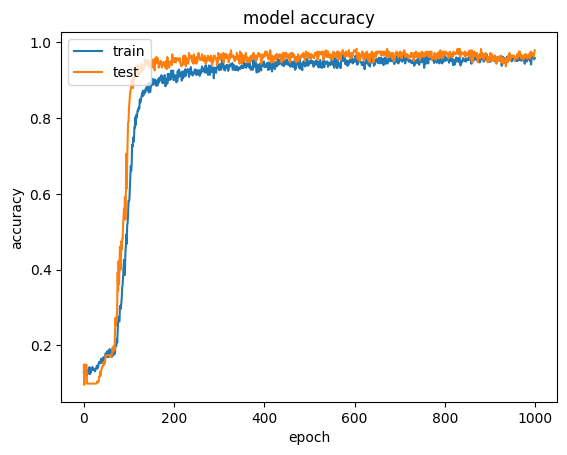

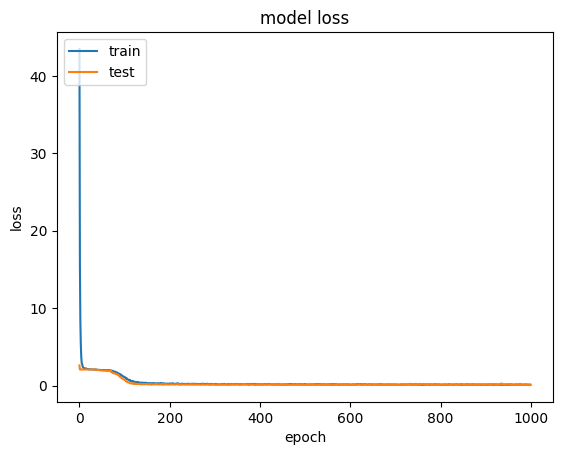

In [117]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [118]:
test_files = ["chords/Bdim_RockGB_JO_4.wav", "chords/Bb_Electric1_LInda_2.wav",
              "chords/C_Classic_Jo_1.wav", "chords/chord.wav",
              "chords/G_AcusticVince_JO_1.wav"]

# For loop through test files
for file in test_files:
    # load file
    audio, sample_rate = librosa.load(file)
    # Get features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Scaled features
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    # print(mfccs_scaled_features)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    print(mfccs_scaled_features)
    print(mfccs_scaled_features.shape)

    # Get predicted label
    predicted_label=model.predict(mfccs_scaled_features)
    predicted_label=np.argmax(predicted_label,axis=1)

    print("File: ", file)
    print("predicted label is:",predicted_label)
    # Get predicted class name
    prediction_class = label_encoder.inverse_transform(predicted_label)
    print("predicted class is:",prediction_class)

[[-2.1220432e+02  7.1093140e+01 -3.0165697e+01  5.5907688e+01
  -1.4442878e+01  4.8134212e+00 -2.2546684e+01 -1.3784544e+01
  -9.6011734e+00 -1.2725350e+01 -2.0233605e+00 -8.1530256e+00
  -1.1482180e+01 -7.9215965e+00 -7.3184156e+00 -5.3567896e+00
  -1.1955849e+01 -6.4411297e+00 -1.0386440e+01 -1.8103266e+00
  -1.1701501e+01  2.4438069e+00  2.9078271e+00  8.2258396e+00
   3.4053659e+00  2.4696894e+00 -3.3231616e+00 -8.4166842e+00
  -5.9013968e+00 -4.5755558e+00 -3.3490520e+00 -1.1638453e+00
  -5.5432286e+00  1.6126597e+00  3.2152085e+00  2.7009010e-02
  -6.8148785e+00 -7.5753398e+00 -5.1289539e+00 -2.5833702e-01]]
(1, 40)
1/1 [==============================] - 0s 135ms/step
File:  chords/Bdim_RockGB_JO_4.wav
predicted label is: [2]
predicted class is: ['Bdim']
[[-5.3456866e+02  8.5230431e+01 -4.7279991e+01  2.0553389e+01
   1.3193236e+01  2.3905659e+01 -8.6077099e+00 -5.0670538e+00
  -2.3942583e+01 -8.5444021e+00 -1.4136621e+01 -2.3235178e+01
  -6.1424060e+00 -9.2839327e+00 -3.9793158e

In [119]:
import pickle
# save model
pickle.dump(model, open('model.pkl','wb'))